In [310]:
import math

import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [311]:
n_sample = 20

In [312]:
x_c1 = pd.read_csv("x_c1.csv")
x_c2 = pd.read_csv("x_c2.csv")

In [313]:
c1_first = np.array([x_c1.columns[0], x_c1.columns[1]])
c2_first = np.array([x_c2.columns[0], x_c2.columns[1]])

In [314]:
c1_first = c1_first.reshape(1,2)
c1_first = c1_first.astype('float64')
c2_first = c2_first.reshape(1,2)
c2_first = c2_first.astype('float64')

In [315]:
x_c1 = np.array(x_c1)
x_c2 = np.array(x_c2)
x_c1 = np.concatenate([c1_first,x_c1])
x_c2 = np.concatenate([c2_first,x_c2])

In [316]:
print(x_c1)
print('---------------------')
print(x_c2)

[[ 1.409     1.7665  ]
 [ 1.4172    0.81191 ]
 [ 0.6715    0.606   ]
 [-1.2075   -1.2225  ]
 [ 0.71724   0.78105 ]
 [ 1.6302    1.6464  ]
 [ 0.48889   0.19439 ]
 [ 1.0347    0.97357 ]
 [ 0.72689   0.63906 ]
 [-0.30344  -0.092267]
 [ 0.29387   0.62055 ]
 [-0.78728  -0.40155 ]
 [ 0.8884    0.5743  ]
 [-1.1471   -1.0656  ]
 [-1.0689   -1.3945  ]
 [-0.8095   -1.1167  ]
 [-2.9443   -2.7992  ]
 [ 1.4384    1.845   ]
 [ 0.32519   0.068603]
 [-0.75493  -0.60122 ]]
---------------------
[[ 0.77442   4.7148  ]
 [ 2.1174    5.8465  ]
 [-0.089064  4.822   ]
 [ 1.0326    5.1813  ]
 [ 1.5525    5.5739  ]
 [ 2.1006    6.7719  ]
 [ 2.5442    5.8888  ]
 [ 1.0859    5.44    ]
 [-0.49159   4.1721  ]
 [ 0.2577    4.2407  ]
 [-0.061582  4.2113  ]
 [ 3.3505    6.3837  ]
 [ 0.3844    3.872   ]
 [ 1.7481    5.6911  ]
 [ 0.80758   5.2169  ]
 [ 1.8886    7.1173  ]
 [ 0.23515   3.9986  ]
 [-0.40227   3.9068  ]
 [-0.42238   3.7475  ]
 [ 1.4882    4.3967  ]]


In [317]:
one = np.ones(shape=(20,1))

In [318]:
#x_c1 = np.append(x_c1,one,axis=1)
#x_c2 = np.append(x_c2,one,axis=1)
x_c1 = np.insert(x_c1,0,1,axis=1)
x_c2 = np.insert(x_c2,0,1,axis=1)

In [319]:
y1 = np.ones(shape=(20,1)) * -1
y2 = np.ones(shape=(20,1))

In [320]:
x = np.concatenate((x_c1,x_c2), axis = 0)
y = np.concatenate((y1, y2), axis = 0)

In [321]:
w = np.random.rand(1,3)
epoch = 300
eta = 0.001

In [322]:
def Perceptron_mis_yx(y, x, w, n_epoch, eta):
    n_sample = int(len(y) / 2)
    x_c1 = x[0:n_sample, :]
    x_c2 = x[n_sample:n_sample*2, :]
    yx = np.repeat(y,repeats=3, axis=1) * x
    print('----- Perceptron_mis_yx() started -----\n')
    for e in range(n_epoch):
        wyx = np.sum(np.repeat(w,repeats=n_sample*2,axis=0)*yx,axis=1)
        yx_misclassified = yx[wyx < 0, :]
        w = w + np.sum(yx_misclassified,axis=0)
        
        err = np.sum(wyx < 0)
        print('err = %d' %(err))
        
        plt.axis([-5,10,-5,10])
        plt.plot(x_c1[:,1],x_c1[:,2],'+b')
        plt.plot(x_c2[:,1],x_c2[:,2],'or')
        xx = np.linspace(-5,10,151)
        yy = -w[0][0] / w[0][2] - w[0][1]/ w[0][2] * xx
        plt.plot(xx, yy, 'k')
        
        if err == 0:
            break

----- Perceptron_mis_yx() started -----

err = 13
err = 26
err = 12
err = 11
err = 10
err = 9
err = 3
err = 2
err = 1
err = 0


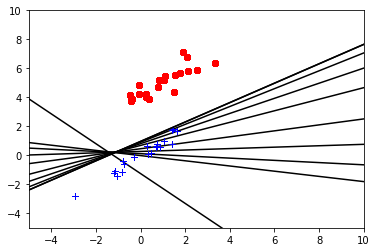

In [323]:
Perceptron_mis_yx(y, x, w, epoch, eta)

In [324]:
def Perceptron_l2(y, x, w, n_epoch, eta):
    n_sample = int(len(y) / 2)
    x_c1 = x[0:n_sample, :]
    x_c2 = x[n_sample:n_sample*2, :]

    print('----- Perceptron_12() started -----\n')
    for e in range(1, n_epoch+1):
        wx = np.sum(np.repeat(w,repeats=n_sample*2,axis=0)*x,axis=1)
        wx = wx.reshape(-1,1)
        diff = np.repeat((y-wx),repeats=3,axis=1)*x
        w = w + eta*np.sum(diff,axis=0)
        
        err1 = 1/2*np.sum( (y - wx)*(y-wx), axis=0)
        err2 = np.sum(y*wx<0)
        print('err(%d) = %f %d' %(e,err1, err2))
        
        plt.axis([-5,10,-5,10])
        plt.plot(x_c1[:,1],x_c1[:,2],'+b')
        plt.plot(x_c2[:,1],x_c2[:,2],'or')
        xx = np.linspace(-5,10,151)
        yy = -w[0][0] / w[0][2] - w[0][1]/ w[0][2] * xx
        plt.plot(xx, yy, 'k')
        
        if err2 == 0:
            break

----- Perceptron_12() started -----

err(1) = 313.396175 13
err(2) = 75.641357 15
err(3) = 39.787585 17
err(4) = 33.532789 19
err(5) = 31.648162 19
err(6) = 30.438507 19
err(7) = 29.361502 19
err(8) = 28.336495 19
err(9) = 27.350479 19
err(10) = 26.400395 19
err(11) = 25.484685 18
err(12) = 24.602051 17
err(13) = 23.751277 17
err(14) = 22.931193 16
err(15) = 22.140676 16
err(16) = 21.378646 16
err(17) = 20.644062 16
err(18) = 19.935921 15
err(19) = 19.253259 15
err(20) = 18.595148 15
err(21) = 17.960694 13
err(22) = 17.349037 13
err(23) = 16.759348 13
err(24) = 16.190828 13
err(25) = 15.642709 13
err(26) = 15.114252 13
err(27) = 14.604744 13
err(28) = 14.113499 13
err(29) = 13.639855 12
err(30) = 13.183175 12
err(31) = 12.742847 12
err(32) = 12.318280 12
err(33) = 11.908904 12
err(34) = 11.514172 12
err(35) = 11.133555 11
err(36) = 10.766545 11
err(37) = 10.412651 10
err(38) = 10.071400 10
err(39) = 9.742339 10
err(40) = 9.425028 9
err(41) = 9.119045 7
err(42) = 8.823982 6
err(43) = 8.

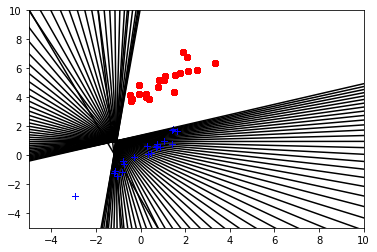

In [325]:
Perceptron_l2(y, x, w, epoch, eta)

In [326]:
lamda = 0.01

In [327]:
w = np.random.rand(1,3)

In [328]:
def SVM(y, x, w, epoch, eta, lamda):
    n_sample = int(len(y) / 2)
    yx = np.tile(y,(1,3))*x
    for e in range(1,epoch+1):
        wyx = np.sum(np.repeat(w,repeats=n_sample*2,axis=0)*yx,axis=1)
        err_idx = wyx<1
        
        w = w + eta*(-2*lamda*w*(n_sample*2) + np.sum(yx[err_idx,:],axis=0))
        
        err1 = np.sum(err_idx)
        err2= np.sum(wyx[err_idx])
        
        abs_w = math.sqrt(np.sum(w*w))
        w23 = math.sqrt(np.sum(w[0][1:3]*w[0][1:3]))
        print('err(%d) = %f %d, w= %f %f %f |w|=%f, |w23|=%f' %(e, err1, err2, w[0][0], w[0][1], w[0][2],abs_w,w23))
        
        plt.axis([-5,10,-5,10])
        plt.plot(x_c1[:,1],x_c1[:,2],'+b')
        plt.plot(x_c2[:,1],x_c2[:,2],'or')
        xx = np.linspace(-5,10,151)
        yy = -w[0][0] / w[0][2] - w[0][1]/ w[0][2] * xx
        plt.plot(xx, yy, 'k')
        

err(1) = 17.000000 -28, w= 0.925744 0.843230 0.859033 |w|=1.518545, |w23|=1.203734
err(2) = 17.000000 -28, w= 0.908004 0.835317 0.851096 |w|=1.498862, |w23|=1.192526
err(3) = 17.000000 -27, w= 0.890277 0.827409 0.843165 |w|=1.479232, |w23|=1.181327
err(4) = 17.000000 -27, w= 0.872565 0.819508 0.835240 |w|=1.459654, |w23|=1.170137
err(5) = 17.000000 -26, w= 0.854867 0.811613 0.827322 |w|=1.440130, |w23|=1.158956
err(6) = 17.000000 -26, w= 0.837183 0.803725 0.819410 |w|=1.420663, |w23|=1.147783
err(7) = 17.000000 -25, w= 0.819513 0.795842 0.811505 |w|=1.401252, |w23|=1.136620
err(8) = 17.000000 -25, w= 0.801858 0.787967 0.803606 |w|=1.381901, |w23|=1.125466
err(9) = 17.000000 -25, w= 0.784216 0.780097 0.795713 |w|=1.362610, |w23|=1.114320
err(10) = 17.000000 -24, w= 0.766589 0.772234 0.787826 |w|=1.343381, |w23|=1.103184
err(11) = 17.000000 -24, w= 0.748976 0.764377 0.779946 |w|=1.324217, |w23|=1.092056
err(12) = 17.000000 -23, w= 0.731376 0.756526 0.772072 |w|=1.305120, |w23|=1.080938
e

err(124) = 18.000000 13, w= -0.890297 -0.194033 0.486114 |w|=1.032756, |w23|=0.523407
err(125) = 16.000000 11, w= -0.901585 -0.201956 0.483960 |w|=1.043005, |w23|=0.524408
err(126) = 18.000000 13, w= -0.910864 -0.210059 0.489554 |w|=1.055207, |w23|=0.532718
err(127) = 17.000000 12, w= -0.921135 -0.217734 0.491396 |w|=1.066475, |w23|=0.537474
err(128) = 17.000000 12, w= -0.931398 -0.225403 0.493237 |w|=1.077772, |w23|=0.542300
err(129) = 17.000000 13, w= -0.941653 -0.233066 0.495076 |w|=1.089096, |w23|=0.547193
err(130) = 17.000000 13, w= -0.951900 -0.240722 0.496914 |w|=1.100447, |w23|=0.552151
err(131) = 17.000000 13, w= -0.962138 -0.248373 0.498750 |w|=1.111823, |w23|=0.557172
err(132) = 16.000000 12, w= -0.971369 -0.255692 0.500654 |w|=1.122314, |w23|=0.562168
err(133) = 16.000000 12, w= -0.980592 -0.263005 0.502556 |w|=1.132825, |w23|=0.567216
err(134) = 15.000000 11, w= -0.988807 -0.269824 0.504650 |w|=1.142461, |w23|=0.572256
err(135) = 15.000000 12, w= -0.997016 -0.276637 0.5067

err(236) = 4.000000 3, w= -1.202066 -0.546044 0.631862 |w|=1.463686, |w23|=0.835113
err(237) = 4.000000 3, w= -1.203104 -0.547261 0.631521 |w|=1.464846, |w23|=0.835651
err(238) = 5.000000 4, w= -1.203142 -0.545125 0.637564 |w|=1.466697, |w23|=0.838838
err(239) = 4.000000 3, w= -1.204179 -0.546342 0.637218 |w|=1.467850, |w23|=0.839367
err(240) = 4.000000 3, w= -1.205216 -0.547558 0.636873 |w|=1.469004, |w23|=0.839897
err(241) = 4.000000 3, w= -1.206252 -0.548773 0.636528 |w|=1.470158, |w23|=0.840429
err(242) = 4.000000 3, w= -1.207287 -0.549987 0.636184 |w|=1.471311, |w23|=0.840961
err(243) = 4.000000 3, w= -1.208321 -0.551201 0.635840 |w|=1.472465, |w23|=0.841495
err(244) = 4.000000 3, w= -1.209354 -0.552413 0.635496 |w|=1.473619, |w23|=0.842030
err(245) = 5.000000 4, w= -1.209387 -0.550273 0.641536 |w|=1.475461, |w23|=0.845203
err(246) = 4.000000 3, w= -1.210419 -0.551486 0.641187 |w|=1.476608, |w23|=0.845729
err(247) = 4.000000 3, w= -1.211451 -0.552698 0.640839 |w|=1.477756, |w23|=0

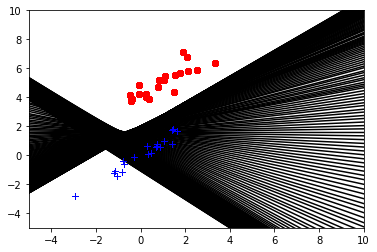

In [329]:
SVM(y, x, w, epoch, eta,lamda)